In [29]:
from  sklearn import  datasets
iris=datasets.load_iris()

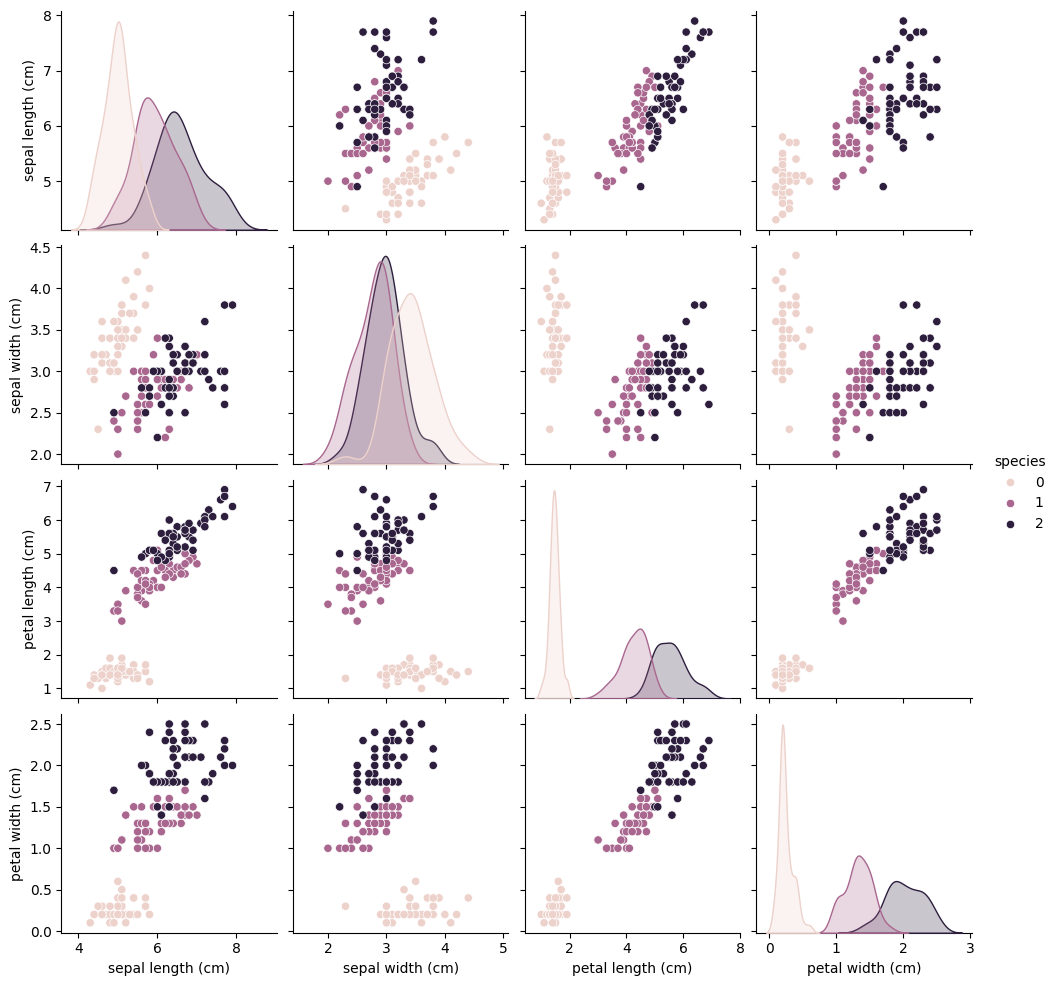

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

sns.pairplot(iris_df, hue='species')
plt.show()


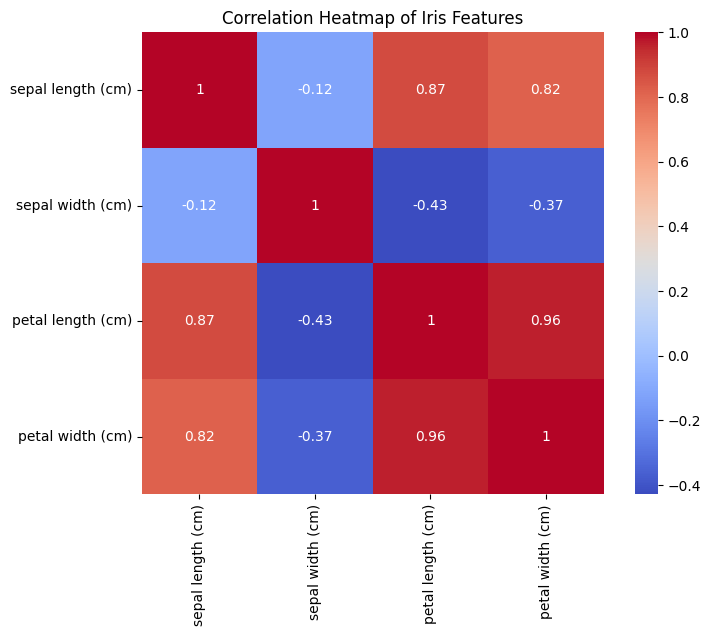

In [31]:
import seaborn as sns
import numpy as np

# correlation matrix
corr_matrix = iris_df.drop('species', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Iris Features')
plt.show()


<Figure size 1000x600 with 0 Axes>

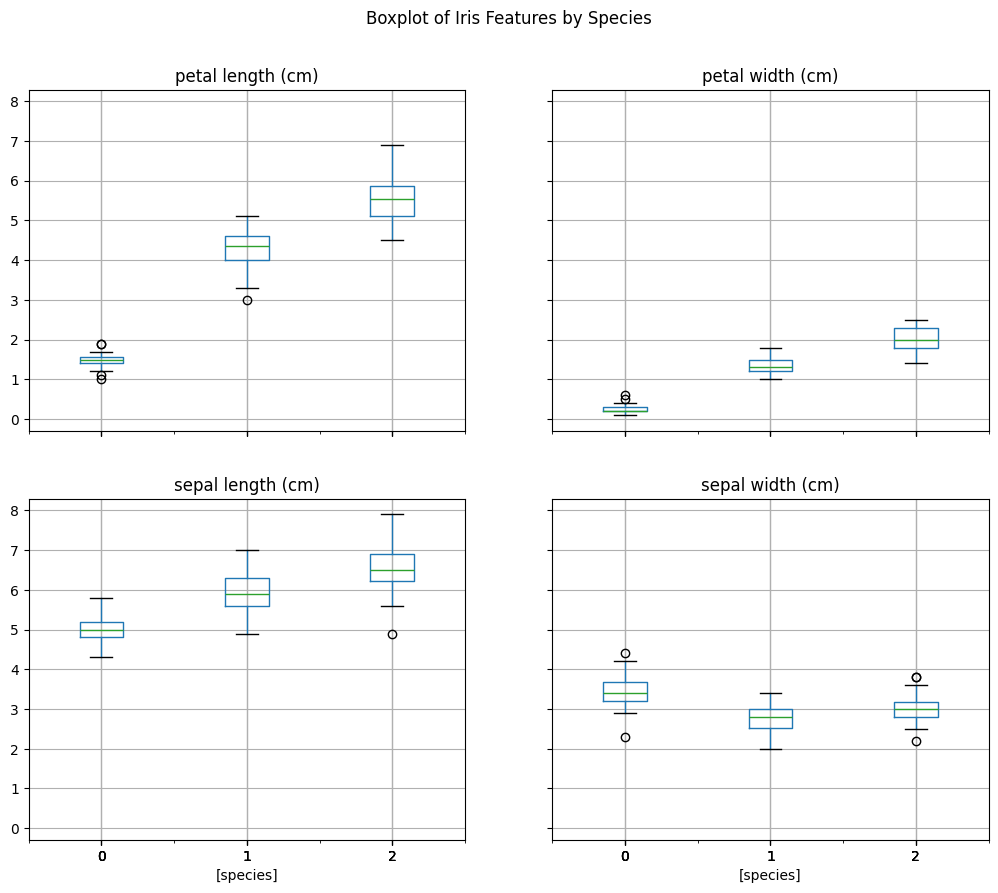

In [32]:
plt.figure(figsize=(10, 6))
iris_df.boxplot(by='species', layout=(2, 2), figsize=(12, 10))
plt.suptitle('Boxplot of Iris Features by Species')
plt.show()


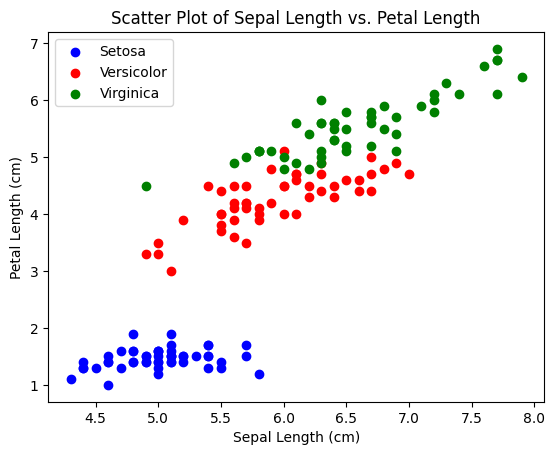

In [33]:
colors = ['blue', 'red', 'green']
species = ['Setosa', 'Versicolor', 'Virginica']

for i in range(3):
    species_data = iris_df[iris_df['species'] == i]
    plt.scatter(species_data['sepal length (cm)'], species_data['petal length (cm)'], color=colors[i], label=species[i])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter Plot of Sepal Length vs. Petal Length')
plt.legend()
plt.show()


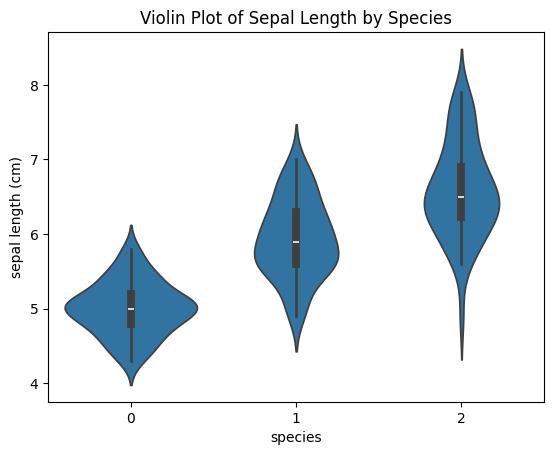

In [34]:
sns.violinplot(x='species', y='sepal length (cm)', data=iris_df)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()


In [35]:
x=iris.data
y=iris.target

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [39]:
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [40]:
predictions=model.predict(x_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9733333333333334


In [42]:
y_pred = model.predict(x_test_scaled)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.96      0.96      0.96        24
   virginica       0.96      0.96      0.96        26

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.97      0.97      0.97        75



In [44]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"\nF1 Score (Weighted): {f1:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}")


F1 Score (Weighted): 0.9733
Precision (Weighted): 0.9733
Recall (Weighted): 0.9733


In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[25  0  0]
 [ 0 23  1]
 [ 0  1 25]]


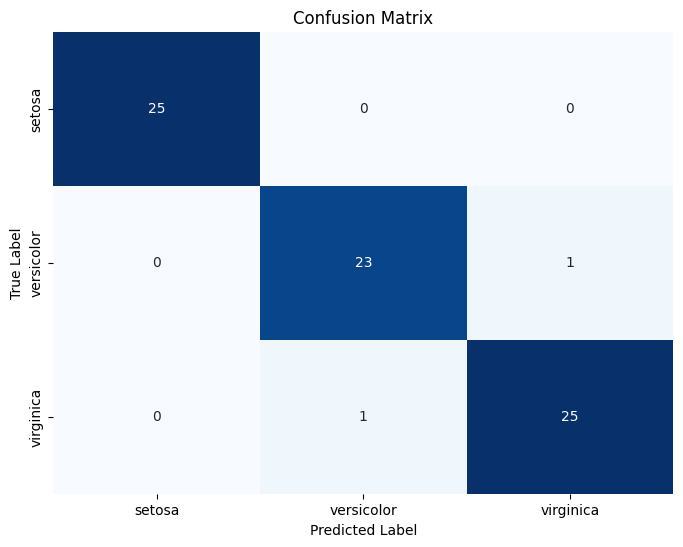

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

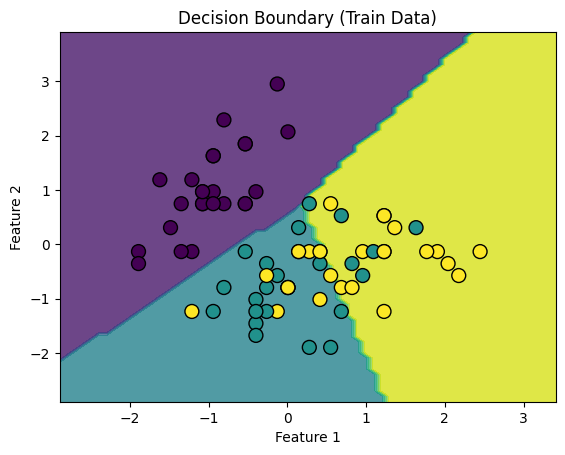

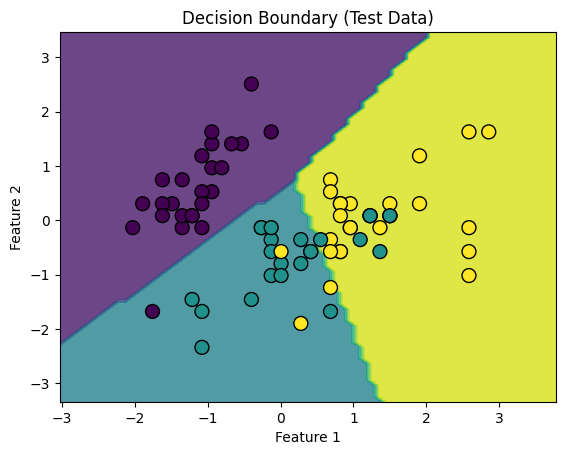

In [47]:
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

X_train_2d = x_train_scaled[:, :2]  
X_test_2d = x_test_scaled[:, :2]
model_2d = LogisticRegression()
model_2d.fit(X_train_2d, y_train)
plot_decision_boundary(X_train_2d, y_train, model_2d, title="Decision Boundary (Train Data)")
plot_decision_boundary(X_test_2d, y_test, model_2d, title="Decision Boundary (Test Data)")